In [18]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

import pandas as pd

# PCA

In [6]:

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [8]:
X[:5,:]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [9]:
X2D[:5,:]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

# MNIST Compression

In [10]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [11]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [23]:
df_retain=pd.DataFrame(cumsum, columns=["retained_variance"])

In [28]:
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py


# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff

In [57]:

trace0=go.Scatter(
        y=df_retain.retained_variance,
        x=df_retain.index,
        name="retained variance",
        mode='lines',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )



trace1=go.Scatter(
        y=np.ones(df_retain.retained_variance.shape)*0.95,
        x=df_retain.index,
        name="95% variance threshold",
        mode='lines',
        marker=dict(
        color="red",
        size=10,
        opacity=0.2,
    
        )
    )



data=[trace0, trace1]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="MNIST dimension reduction analysis",
        xaxis=dict(title="No. of dimensions"),
        yaxis=dict(title="Retainde Variance"),

    
    ))
iplot(figure)

In [80]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [81]:
pca.n_components_

154

In [82]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557437

In [83]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [84]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

<Figure size 504x288 with 0 Axes>

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Compressed')

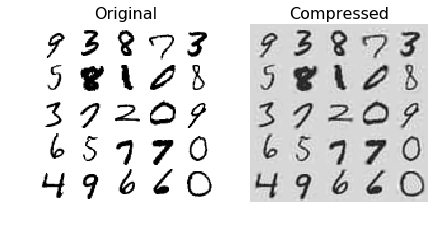

In [86]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


In [87]:

X_reduced_pca = X_reduced

# Incremental PCA

In [88]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

.

IncrementalPCA(batch_size=None, copy=True, n_components=154, whiten=False)

In [89]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

<Figure size 504x288 with 0 Axes>

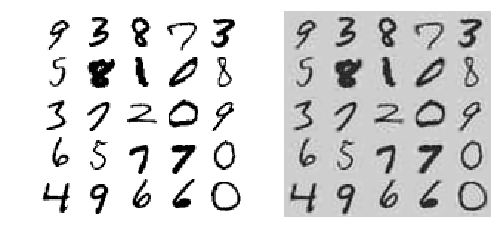

In [90]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [91]:
X_reduced_inc_pca = X_reduced

In [92]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [93]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# Time complexity

In [94]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

    PCA: 1.0 seconds


IncrementalPCA(batch_size=500, copy=True, n_components=2, whiten=False)

    IncrementalPCA: 7.2 seconds


PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

    PCA: 1.0 seconds
n_components = 10


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

    PCA: 1.1 seconds


IncrementalPCA(batch_size=500, copy=True, n_components=10, whiten=False)

    IncrementalPCA: 8.2 seconds


PCA(copy=True, iterated_power='auto', n_components=10, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

    PCA: 1.2 seconds
n_components = 154


PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

    PCA: 4.1 seconds


IncrementalPCA(batch_size=500, copy=True, n_components=154, whiten=False)

    IncrementalPCA: 13.2 seconds


PCA(copy=True, iterated_power='auto', n_components=154, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

    PCA: 3.9 seconds


PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 0, 'n_samples')

Text(0, 0.5, 'Training time')

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

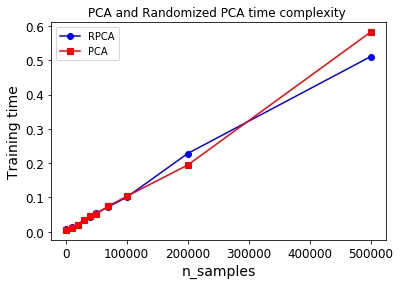

In [95]:

times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 0, 'n_features')

Text(0, 0.5, 'Training time')

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

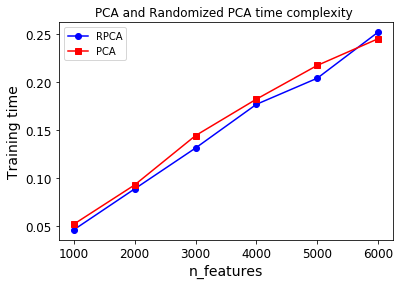

In [96]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

# Kernel PCA

In [97]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [102]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Text(0.5, 0, '$x_1$')

Text(0.5, 0, '$x_2$')

Text(0.5, 0, '$x_3$')

(-11.5, 14)

(-2, 23)

(-12, 15)

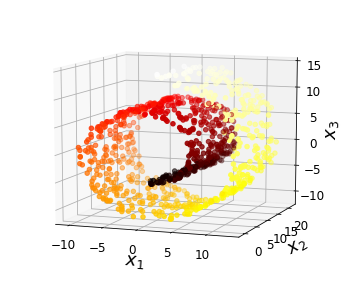

In [111]:

from mpl_toolkits.mplot3d import Axes3D
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

<Figure size 792x288 with 0 Axes>

Text(0.5, 1.0, 'Linear kernel')

Text(0.5, 0, '$z_1$')

Text(0, 0.5, '$z_2$')

Text(0.5, 1.0, 'RBF kernel, $\\gamma=0.04$')

Text(0.5, 0, '$z_1$')

Text(0.5, 1.0, 'Sigmoid kernel, $\\gamma=10^{-3}, r=1$')

Text(0.5, 0, '$z_1$')

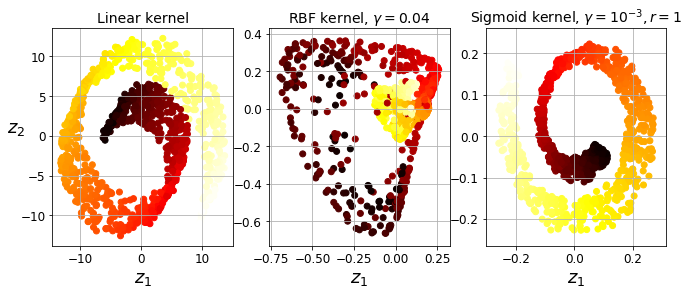

In [119]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()

<Figure size 432x360 with 0 Axes>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 0, '')

[]

[]

[]

NameError: name 'save_fig' is not defined

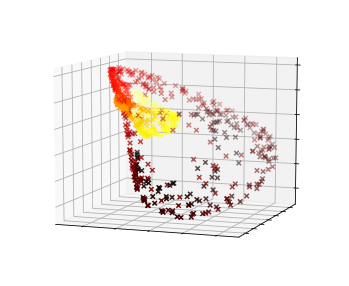

In [120]:

plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

save_fig("preimage_plot", tight_layout=False)
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRe...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [126]:

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [127]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.7863087957661

# LLE

In [130]:

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [131]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

Text(0.5, 1.0, 'Unrolled swiss roll using LLE')

Text(0.5, 0, '$z_1$')

Text(0, 0.5, '$z_2$')

[-0.065, 0.055, -0.1, 0.12]

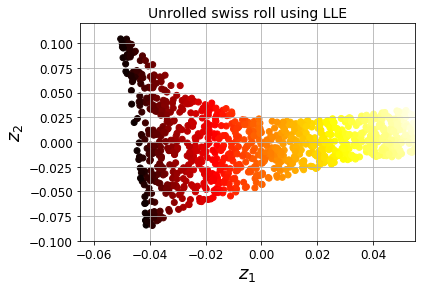

In [133]:

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

# MDS, Isomap, t-SNE

In [134]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [135]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [136]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning:

Variables are collinear.



LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<Figure size 792x288 with 0 Axes>

Text(0.5, 1.0, 'MDS')

Text(0.5, 0, '$z_1$')

Text(0, 0.5, '$z_2$')

Text(0.5, 1.0, 'Isomap')

Text(0.5, 0, '$z_1$')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 0, '$z_1$')

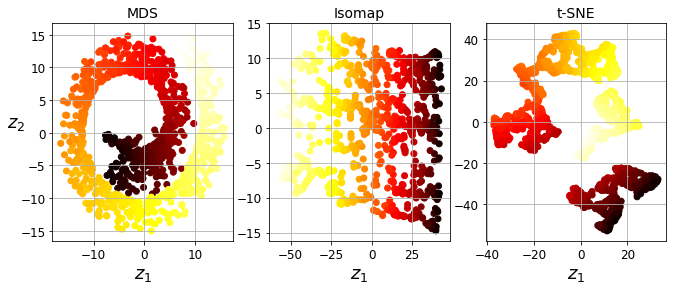

In [139]:

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()